In [441]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re #regular expression - > removing patterns 
%matplotlib inline
from wordcloud import WordCloud #visualise
from datetime import datetime #dattime convert
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter #counting values
from nltk.stem.porter import PorterStemmer #stemming
from nltk.util import ngrams #ngram method

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [442]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aysegulsubasi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aysegulsubasi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aysegulsubasi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/aysegulsubasi/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [443]:
fake= pd.read_csv("./Fake.csv")
true=pd.read_csv("./True.csv")

In [444]:
fake_orginal=pd.read_csv("./Fake.csv")
true_orginal=pd.read_csv("./True.csv")

In [445]:
fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [446]:
true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [447]:
true["status"]= 1
fake["status"]= 0 #binary classifiation

In [448]:
df=pd.concat([true,fake])
orginal=pd.concat([true,fake])#copy orginal

In [449]:
#reuters is using polictsnews so decided to put it together

df.subject=df.subject.replace({'politics':'politics','politicsNews':'politics'})

In [450]:
df.head(10)

,title,text,subject,date,status
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politics,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politics,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politics,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politics,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politics,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politics,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politics,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politics,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politics,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politics,"December 28, 2017",1


In [451]:
df.isnull().sum() #null values

title      0
text       0
subject    0
date       0
status     0
dtype: int64

In [452]:
df.duplicated(subset = None, keep = 'first').sum() # duplicates

209

In [453]:
df.shape

(44898, 5)

In [454]:
#drop duplicates
df = df.drop_duplicates().reset_index()
df = df.drop(columns = ["index"])

In [455]:
df.shape

(44689, 5)

In [456]:
df.dtypes # convert date -> datetime

title      object
text       object
subject    object
date       object
status      int64
dtype: object

In [457]:
#df.status.astype(bool)

In [458]:
df["status"].value_counts() # fake vs no fake -> if there is the very high different between the positive values and negative values. Then we can say our dataset in Imbalance Dataset.

0    23478
1    21211
Name: status, dtype: int64

In [459]:
df["date"].unique() #checking whats going on in date

array(['December 31, 2017 ', 'December 29, 2017 ', 'December 30, 2017 ',
       ..., 'December 18, 2017', 'December 14, 2017', 'December 8, 2017'],
      dtype=object)

In [460]:
# df['date'] = pd.to_datetime(df['date']) # -> links in the date?! interesting

In [461]:
df[df['date'].str.contains("http")].head(1000) #filterint http

,title,text,subject,date,status
30569,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,0
36715,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,0
36716,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,0
37047,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0
37048,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0
38640,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,0
38641,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,0
43077,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,0
43078,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,0


In [462]:
#drop rows by index with https
df.drop(index=[30569,36715,36716,37047,37048,38640,38641,43077,43078], inplace=True)

In [463]:
# df['date'] = pd.to_datetime(df['date']) - >again error MSNBC text

In [464]:
df[df['date'].str.contains("MSNBC")] #filtering to search for this

,title,text,subject,date,status
40141,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,0


In [465]:
df= df.reset_index(drop=True) # reseting index to delet the row

In [466]:
df[df['date'].str.contains("MSNBC")].head(1000) #lets check if this one is important

,title,text,subject,date,status
40134,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,0


In [467]:
df.iloc[40134,1] #chekcing if its important - > decision: useless

'[vc_row][vc_column width= 1/1 ][td_block_trending_now limit= 5 ][td_block_big_grid sort= featured ][/vc_column][/vc_row][vc_row] [vc_column width= 2/3 ][td_block_5 limit= 24  custom_title= HOT OFF THE PRESS!  td_filter_default_txt= All  ajax_pagination= load_more  border_top= no_border_top ] [/vc_column][vc_column width= 1/3 ][vc_widget_sidebar sidebar_id= td-default ][/vc_column] [/vc_row][vc_row][vc_column width= 1/1 ][td_block_14 limit= 3  custom_title= EVEN MORE NEWS  td_filter_default_txt= All  ajax_pagination= next_prev  header_color= #288abf ][/vc_column] [/vc_row]'

In [468]:
df.drop(index=[40134], inplace=True) #drop useless raw

In [469]:
#new try
help(pd.to_datetime)

Help on function to_datetime in module pandas.core.tools.datetimes:

to_datetime(arg: 'DatetimeScalarOrArrayConvertible', errors: 'str' = 'raise', dayfirst: 'bool' = False, yearfirst: 'bool' = False, utc: 'bool | None' = None, format: 'str | None' = None, exact: 'bool' = True, unit: 'str | None' = None, infer_datetime_format: 'bool' = False, origin='unix', cache: 'bool' = True) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'
    Convert argument to datetime.
    
    Parameters
    ----------
    arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like
        The object to convert to a datetime.
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
        - If 'raise', then invalid parsing will raise an exception.
        - If 'coerce', then invalid parsing will be set as NaT.
        - If 'ignore', then invalid parsing will return the input.
    dayfirst : bool, default False
        Specify a date parse order if `arg` is str or its li

In [470]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)#timezones

In [471]:
df["date"].unique

<bound method Series.unique of 0       2017-12-31
1       2017-12-29
2       2017-12-31
3       2017-12-30
4       2017-12-29
           ...    
44675   2016-01-16
44676   2016-01-16
44677   2016-01-15
44678   2016-01-14
44679   2016-01-12
Name: date, Length: 44679, dtype: datetime64[ns]>

cheatsheet
https://learnbyexample.github.io/python-regex-cheatsheet/

In [472]:
digits = r"\d+"
print(re.findall(digits, df["text"][0])) #sample to check if i need to delete them 


['2018', '7', '10', '11', '1', '5', '10', '20', '1', '5', '30', '2018', '2018', '6', '7', '81', '44']


In [473]:
def clean_text(x):
    x = str(x).lower().replace("_"," ")
    x = re.sub(r'\W+',' ',x) # Replace everything non-alpahnumeric by ' '
    x = re.sub(r'\s+',' ',x) # Replace one or more whitespaces by  ' '
    x = re.sub(r'\d+',"",x) # Replace one or more digits by  ' '
    
    return x

In [474]:
df["text"][0] #checking text before cleaning and applying function

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

In [475]:
df["title"][0]

'As U.S. budget fight looms, Republicans flip their fiscal script'

In [476]:
df["text"]=df["text"].apply(clean_text) #applying function to clean but a new dataframe all_cleaned
df["title"]=df["title"].apply(clean_text) #applying function to clean but a new dataframe all_cleaned

In [477]:
df["text"][0]

'washington reuters the head of a conservative republican faction in the u s congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a fiscal conservative on sunday and urged budget restraint in  in keeping with a sharp pivot under way among republicans u s representative mark meadows speaking on cbs face the nation drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for non defense discretionary spending on programs that support education scientific research infras

In [478]:
df["title"][0]

'as u s budget fight looms republicans flip their fiscal script'

In [479]:
# combine title and text together and seperate the words and put it into all
df['all_cleaned'] = df['title'] + " "  + df['text']
df.head()

,title,text,subject,date,status,all_cleaned
0,as u s budget fight looms republicans flip the...,washington reuters the head of a conservative ...,politics,2017-12-31,1,as u s budget fight looms republicans flip the...
1,u s military to accept transgender recruits on...,washington reuters transgender people will be ...,politics,2017-12-29,1,u s military to accept transgender recruits on...
2,senior u s republican senator let mr mueller d...,washington reuters the special counsel investi...,politics,2017-12-31,1,senior u s republican senator let mr mueller d...
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geor...,politics,2017-12-30,1,fbi russia probe helped by australian diplomat...
4,trump wants postal service to charge much more...,seattle washington reuters president donald tr...,politics,2017-12-29,1,trump wants postal service to charge much more...


DONE TILL HERE: 
+ removed URL by dropping rows
+ changed datetime date
+ new column 
+ Replace everything non-alpahnumeric ' '
+ Replace one or more whitespaces by  ' '
+ Replaced one or more digits by  ' '
+ stop words / without stop 
+ lemma! stemming
+ n_grams-> 

## before decideing what to clean i want to see unique words, stop words and the most frequent ones

what I want before getting more insights:

+ new column with text length for analysing - done 
+ filter author and newspaper? 
+ for modelling column text + title - done
+ tokenziation :remove stop words and words >2 from the new column (text+title) 


In [480]:
##adding the length words to check if fake and real news difference:
#df["length_text"]= list(map(lambda x: len(str(x).split()), df['text']))
#data['length_text'].describe()

In [481]:

df["text"][899] #'(Reuters) - trying to split hyphen(-)

' reuters republicans in the u s house of representatives are due to release tax legislation on thursday calling for slashing taxes on corporations repealing some taxes paid primarily by the wealthy and adjusting other taxes on families and individuals as questions about the final shape of the bill swirl around washington the following is a look at the basic features of the plan released in september though changes are expected reduce the u s corporate income tax rate to  percent from a current statutory  percent eliminate the corporate alternative minimum tax move to a territorial tax system that no longer imposes the u s corporate tax on foreign profits of u s companies require u s corporations to return assets held overseas at lowered one time tax rates establish a minimum global tax aimed at the overseas profits of u s corporations to prevent tax base erosion pass through businesses limit the maximum tax rate on small businesses and other non corporate enterprises to  percent down 

In [482]:
#before further cleaning , i want to check most frequent words before cleaning

Counter(" ".join(df["text"]).split()).most_common(500)
# extending stop words, # Reuters

[('the', 1021096),
 ('to', 533666),
 ('of', 439577),
 ('a', 411267),
 ('and', 407287),
 ('in', 350841),
 ('s', 283239),
 ('that', 239021),
 ('on', 190879),
 ('for', 172518),
 ('is', 166119),
 ('trump', 133959),
 ('he', 132827),
 ('it', 132633),
 ('said', 131629),
 ('with', 117312),
 ('was', 115187),
 ('as', 104628),
 ('his', 95939),
 ('by', 95326),
 ('has', 87983),
 ('be', 83267),
 ('have', 82117),
 ('not', 81415),
 ('from', 79972),
 ('this', 79389),
 ('at', 75296),
 ('are', 72327),
 ('who', 69780),
 ('they', 67567),
 ('an', 67454),
 ('i', 62474),
 ('we', 61243),
 ('but', 60639),
 ('president', 55683),
 ('would', 54814),
 ('t', 54150),
 ('u', 53796),
 ('about', 50312),
 ('will', 49110),
 ('you', 47215),
 ('their', 46919),
 ('had', 45760),
 ('been', 42373),
 ('people', 41678),
 ('were', 40316),
 ('or', 39994),
 ('more', 39857),
 ('which', 38114),
 ('she', 37974),
 ('one', 37837),
 ('after', 37023),
 ('her', 36352),
 ('if', 35778),
 ('all', 34990),
 ('out', 34537),
 ('state', 34280),
 ('

In [483]:
stop_words = list(stopwords.words('english')) #checking stop words
stop_words.extend(["com"]) #after checking most frequent words I've decided to extend it
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [484]:
#"all_cleaned"= title + text cleaned but with stop words
#tokenized =  tokenized all cleaned and removed stop words, split, len_3 
#lemmetizted= tokenized df -> lemmitzed the words 

## Tokenization: -> all cleaned colum

Tokenization is a task of breaking text into words or sentences. 

In [485]:
gensim.parsing.preprocessing.STOPWORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [486]:
#Remove stopwords and remove words with 2 or less characters
# gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)
#Convert a document into a list of lowercase tokens, ignoring tokens that are too short or too long.

def preprocess(all_cleaned):#text date the column -> apliy the function to orginal column , gensim a libary for NLP 
    result = []
    for token in gensim.utils.simple_preprocess(all_cleaned): #take tokens check if you find stop words- > if not put it in results
        if token not in gensim.parsing.preprocessing.STOPWORDS and token not in stop_words:
            result.append(token) #len acceed words "re"
            
    return result

In [487]:
df["tokenized"] = df["all_cleaned"].apply(preprocess)

In [488]:
df["tokenized"][0]  

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'pay',
 'tax',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'way',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'cbs',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'big',
 'budget',
 'increase',
 'military',
 'spending',
 '

## Lemmatized - > 

very efficent way , best guess where to snap the word

An issue when handling language data is the existence of various forms of a single word. For example, the verb “cooking” can appear in different forms such as “cooked”; it can also be used as a noun in a slightly modified version. As classification algorithm are not able to identify the deeper meaning behind words, they treat all of those variations as incoherent. (Perkins, 2014)



after cleaning stop words and tokenizing i decided to lemmatize the words and put it into a new df 
also i want to keep " all " with stop words


In [489]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized):
    lemm = [wn.lemmatize(word) for word in tokenized]
    return lemm

In [490]:
df["all_cleaned"][0]

'as u s budget fight looms republicans flip their fiscal script washington reuters the head of a conservative republican faction in the u s congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a fiscal conservative on sunday and urged budget restraint in  in keeping with a sharp pivot under way among republicans u s representative mark meadows speaking on cbs face the nation drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for non defense discretionary spendin

In [491]:
df['lemmatized'] = df['tokenized'].apply(lemmatizing)

In [492]:
df['lemmatized'][3]

['fbi',
 'russia',
 'probe',
 'helped',
 'australian',
 'diplomat',
 'tip',
 'nyt',
 'washington',
 'reuters',
 'trump',
 'campaign',
 'adviser',
 'george',
 'papadopoulos',
 'told',
 'australian',
 'diplomat',
 'russia',
 'political',
 'dirt',
 'democratic',
 'presidential',
 'candidate',
 'hillary',
 'clinton',
 'new',
 'york',
 'time',
 'reported',
 'saturday',
 'conversation',
 'papadopoulos',
 'diplomat',
 'alexander',
 'downer',
 'london',
 'driving',
 'factor',
 'fbi',
 'decision',
 'open',
 'counter',
 'intelligence',
 'investigation',
 'moscow',
 'contact',
 'trump',
 'campaign',
 'time',
 'reported',
 'month',
 'meeting',
 'australian',
 'official',
 'passed',
 'information',
 'came',
 'papadopoulos',
 'american',
 'counterpart',
 'leaked',
 'democratic',
 'email',
 'began',
 'appearing',
 'online',
 'according',
 'newspaper',
 'cited',
 'current',
 'foreign',
 'official',
 'information',
 'australian',
 'probe',
 'federal',
 'bureau',
 'investigation',
 'propelled',
 'intell

In [493]:
df["tokenized"][3]

['fbi',
 'russia',
 'probe',
 'helped',
 'australian',
 'diplomat',
 'tip',
 'nyt',
 'washington',
 'reuters',
 'trump',
 'campaign',
 'adviser',
 'george',
 'papadopoulos',
 'told',
 'australian',
 'diplomat',
 'russia',
 'political',
 'dirt',
 'democratic',
 'presidential',
 'candidate',
 'hillary',
 'clinton',
 'new',
 'york',
 'times',
 'reported',
 'saturday',
 'conversation',
 'papadopoulos',
 'diplomat',
 'alexander',
 'downer',
 'london',
 'driving',
 'factor',
 'fbi',
 'decision',
 'open',
 'counter',
 'intelligence',
 'investigation',
 'moscow',
 'contacts',
 'trump',
 'campaign',
 'times',
 'reported',
 'months',
 'meeting',
 'australian',
 'officials',
 'passed',
 'information',
 'came',
 'papadopoulos',
 'american',
 'counterparts',
 'leaked',
 'democratic',
 'emails',
 'began',
 'appearing',
 'online',
 'according',
 'newspaper',
 'cited',
 'current',
 'foreign',
 'officials',
 'information',
 'australians',
 'probe',
 'federal',
 'bureau',
 'investigation',
 'propelled',

## Stemming

#reduce to word stamp - > males -> male , playing-> play , studying -> study , 

- ring -> also hold "ing"

not very efficent method thats why I'm not gonna use it for now



## Getting insights:

## Difference in fake vs real

+ length of words
+ most frequent words fake vs real
+ subjects
+ day of publish
+ difference in words

In [494]:
#dataframe with the days to check 

df["year"] = df["date"].dt.year
#df["month"]=
#df["days"]=

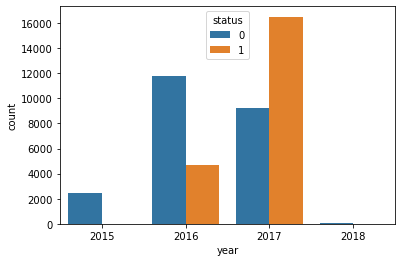

In [495]:
ax = sns.countplot(x="year", hue="status", data=df)

In [496]:
#drop 2015/2018 just fake data

#df = df.drop(df.loc[(df['year'] == 2018)|(df['year'] == 2015)].index)

In [497]:
df.shape

(44679, 9)

In [498]:
#ax = sns.countplot(x="date", hue="status", data=df)

##  Analysing tokens

In [499]:
#pd convert words in lemmanized column to a string, decided to use that 

df["lemmatized_joined"] = df["lemmatized"].apply(lambda x: " ".join(x)) # convert all the unque words to numbers , 

# join all the information that are sepratet by space


In [500]:
#for wordcloud generate i needed a text so converted


text_fake= " ".join(text for text in df.loc[df["status"]==0].lemmatized_joined)#fake
text_real= " ".join(text for text in df.loc[df["status"]==1].lemmatized_joined) #real
print ("There are {} words in fake news .".format(len(text_fake)))
print ("There are {} words in real news .".format(len(text_real)))

There are 38464807 words in fake news .
There are 34478847 words in real news .


In [501]:
text_fake[0]

'd'

In [502]:
from PIL import Image

In [503]:
mask_trump= np.array(Image.open("./trump.png"))


In [504]:
ls

Cleaning - Fake News.ipynb    True.csv
Fake.csv                      Untitled.ipynb
Final-Project                 fake.png
Final-Project.ipynb           fakevstrue_cleaned.csv
Images/                       modelling-Copy1.ipynb
Live Demo.ipynb               preprocessing+modeling.ipynb
Pickle_svc_Model.pkl          trump.png
README.md


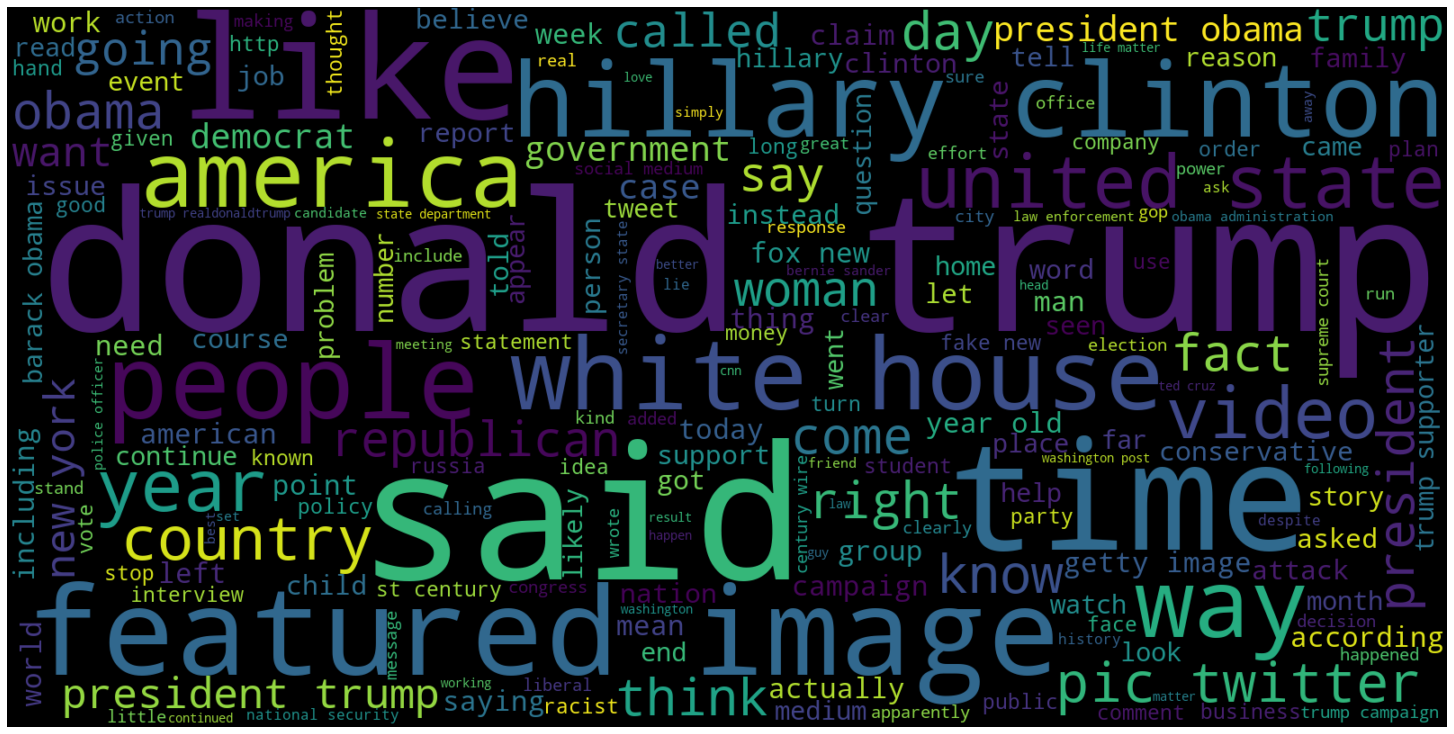

In [505]:
# plot the word cloud for text that is Fake



# Create and generate a word cloud image:

wc = WordCloud(max_words = 200 ,width= 1600, height= 800, stopwords = stop_words).generate(text_fake)
## Display the generated image:

plt.figure(figsize = (20,20))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off") # display image appear more smoothly
plt.tight_layout(pad=0)
plt.show()


#wc.savefig('Images/wordcloud_fake.png', bbox_inches='tight')

In [506]:
# I wanted to put in stop_gen but its a frozen set so if i have time at the end i will try to use it

#As shown in the graph above, the most frequent words display in larger fonts. The word cloud can be displayed in any shape or image.


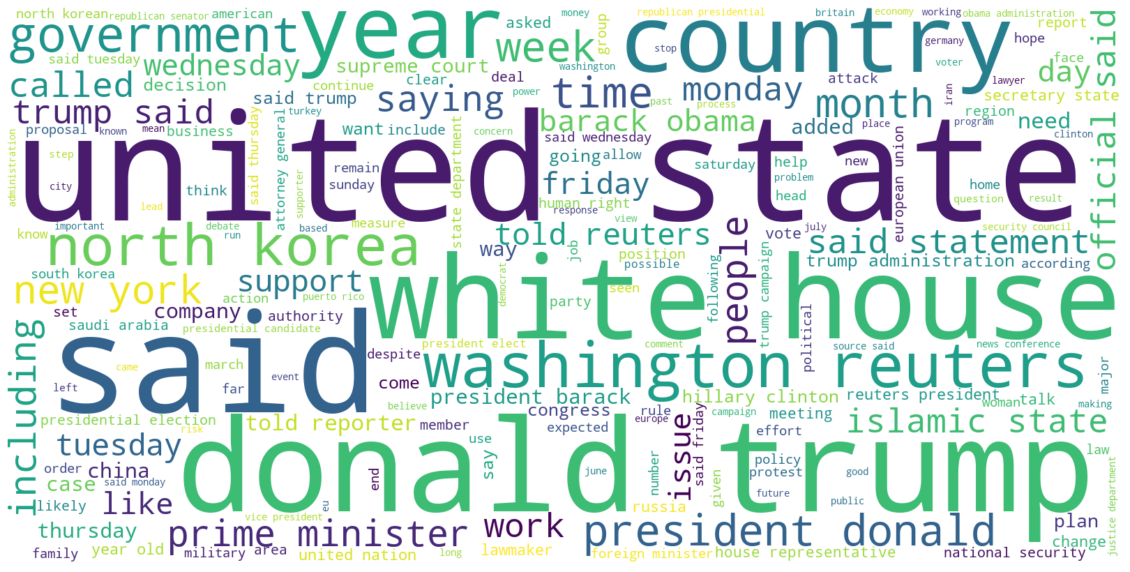

In [507]:
plt.figure(figsize = (20,20)) 


# Create and generate a word cloud image:

wc_true = WordCloud(background_color="white", max_words = 200 , width= 1600, height= 800, stopwords = stop_words).generate(text_real)
## Display the generated image:

plt.imshow(wc_true, interpolation = 'bilinear')
plt.axis("off")# display image appear more smoothly
plt.show()

#wc_true.savefig('Images/wordcloud_real.png', bbox_inches='tight')

In [508]:
Counter(" ".join(text for text in df.loc[df["status"]==1].lemmatized_joined).split()).most_common(10)

[('said', 97881),
 ('trump', 59656),
 ('state', 38050),
 ('president', 28941),
 ('reuters', 28816),
 ('republican', 23838),
 ('year', 22607),
 ('government', 20098),
 ('house', 18328),
 ('new', 17629)]

In [509]:
#decided to split the datasat here to workd better for visualisation

fake= df.loc[df.status==0]
real= df.loc[df.status==1]

In [510]:
fake_org= orginal.loc[df.status==0]
real_org= orginal.loc[df.status==1]

In [511]:

n_gram_fake= Counter(" ".join(text for text in df.loc[df["status"]==0].lemmatized_joined).split()).most_common(200)

In [512]:
n_gram_fake=pd.DataFrame(n_gram_fake)


In [513]:
n_gram_fake.value_counts()[:30]

0                1    
according        8139     1
real             4080     1
power            3888     1
president        29563    1
presidential     5875     1
press            4851     1
problem          3825     1
program          3762     1
public           6902     1
question         5418     1
racist           4209     1
read             4824     1
realdonaldtrump  4372     1
act              4163     1
reason           3938     1
report           8182     1
reported         3925     1
republican       17623    1
right            15321    1
russia           6353     1
russian          5878     1
said             33956    1
sander           4068     1
say              7664     1
post             5623     1
political        7825     1
policy           5605     1
police           9527     1
nation           5830     1
national         7563     1
dtype: int64

In [514]:
Counter(" ".join(text for text in df.loc[df["status"]==0].lemmatized_joined).split()).most_common(30)

[('trump', 89374),
 ('said', 33956),
 ('president', 29563),
 ('people', 27193),
 ('state', 24259),
 ('obama', 21416),
 ('clinton', 21034),
 ('time', 19666),
 ('year', 19539),
 ('like', 19076),
 ('american', 18897),
 ('donald', 18638),
 ('video', 17735),
 ('republican', 17623),
 ('hillary', 16486),
 ('news', 15542),
 ('right', 15321),
 ('new', 15318),
 ('image', 14707),
 ('white', 14473),
 ('medium', 12503),
 ('know', 12280),
 ('woman', 12253),
 ('twitter', 12175),
 ('campaign', 12120),
 ('america', 11961),
 ('house', 11853),
 ('country', 11632),
 ('election', 10823),
 ('day', 10569)]

In [515]:
Counter(" ".join(text for text in df.loc[df["status"]==1].lemmatized_joined).split()).most_common(200)

[('said', 97881),
 ('trump', 59656),
 ('state', 38050),
 ('president', 28941),
 ('reuters', 28816),
 ('republican', 23838),
 ('year', 22607),
 ('government', 20098),
 ('house', 18328),
 ('new', 17629),
 ('party', 15514),
 ('united', 15418),
 ('people', 15263),
 ('election', 15258),
 ('official', 14952),
 ('told', 14113),
 ('country', 14056),
 ('washington', 13014),
 ('campaign', 11366),
 ('group', 11255),
 ('leader', 11058),
 ('court', 11017),
 ('week', 10706),
 ('security', 10636),
 ('north', 10619),
 ('donald', 10440),
 ('white', 10336),
 ('tax', 10211),
 ('clinton', 10169),
 ('percent', 10018),
 ('obama', 9993),
 ('senate', 9936),
 ('minister', 9914),
 ('law', 9893),
 ('time', 9770),
 ('vote', 9603),
 ('right', 9508),
 ('china', 9497),
 ('month', 9233),
 ('russia', 8919),
 ('national', 8635),
 ('statement', 8525),
 ('democratic', 8495),
 ('administration', 8491),
 ('foreign', 8446),
 ('military', 8350),
 ('democrat', 8345),
 ('tuesday', 8255),
 ('presidential', 8254),
 ('day', 8115)

In [516]:
#getting rid of hypishis so i can use 3gram better

def clean_text(x):
    x = str(x).lower().replace("_"," ")
    x = re.sub(r'\W+',' ',x) # Replace everything non-alpahnumeric by ' '
    x = re.sub(r'\s+',' ',x) # Replace one or more whitespaces by  ' '
    x = re.sub(r'\d+',"",x) # Replace one or more digits by  ' '
    
    return x

In [ ]:
#to check the context lets use 3-gram:In case of 3-grams, we pass the value of n=3 in ngrams function of NLTK. 
#using original words-> orginal dataset tokenized to check the context 
n=3

unigrams_fake = ngrams(" ".join(text for text in df.loc[orginal["status"]==0].lemmatized_joined).split(), n)                                                 
                                                        #and df.loc[df["subject"]=="politics"].lemmatized_joined).split(), n)


In [518]:
unigrams_fake=pd.DataFrame(unigrams_fake)


In [519]:
unigrams_fake.value_counts(normalize=True).mul(100).round(3)[:30] # from 5233334 rows

0            1            2              
st           century      wire               0.037
donald       trump        realdonaldtrump    0.032
new          york         time               0.031
black        life         matter             0.028
president    donald       trump              0.020
             united       state              0.020
news         st           century            0.018
president    barack       obama              0.018
featured     image        video              0.017
member       wire         tv                 0.015
century      wire         say                0.014
video        screen       capture            0.014
image        video        screen             0.013
getty        image        trump              0.013
new          york         city               0.013
featured     image        screenshot         0.012
www          youtube      watch              0.011
http         www          youtube            0.011
director     james        comey         

In [520]:

unigrams_true = ngrams(" ".join(text for text in df.loc[df["status"]==1].lemmatized_joined).split(), n)

In [521]:
unigrams_true=pd.DataFrame(unigrams_true)

In [522]:
unigrams_true.value_counts(normalize=True)[:30].mul(100).round(3)[:30]

0           1             2         
president   donald        trump         0.127
            barack        obama         0.064
reuters     president     donald        0.034
washington  reuters       president     0.033
white       house         said          0.021
new         york          reuters       0.018
elect       donald        trump         0.018
president   elect         donald        0.018
respond     request       comment       0.017
president   vladimir      putin         0.017
state       rex           tillerson     0.015
secretary   state         rex           0.015
national    security      adviser       0.014
russian     president     vladimir      0.013
speaker     paul          ryan          0.013
washington  reuters       republican    0.013
prime       minister      theresa       0.013
donald      trump         said          0.012
chancellor  angela        merkel        0.012
leader      mitch         mcconnell     0.012
democratic  president     barack        0.0

In [523]:
#tokenizing sentences, here Im using the orginala dataset again because of the punctuation etc. -> deleting lenght_text maybe later?


from nltk.tokenize import sent_tokenize


orginal['sent_tokens'] = orginal['text'].apply(sent_tokenize)
orginal['len_sentence'] = orginal['sent_tokens'].apply(len)


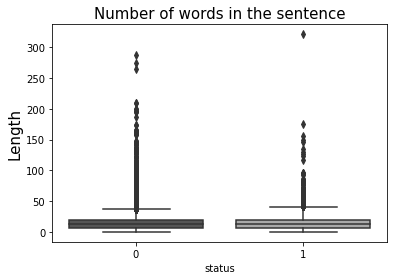

In [524]:
sent= sns.boxplot(y='len_sentence', x='status', data=orginal , palette="gray")
sent.axes.set_title("Number of words in the sentence", fontsize=15)
sent.set_ylabel("Length",fontsize=15)

plt.show()

#fake has more outliers

In [525]:
from nltk.tokenize import word_tokenize


#word length from text

orginal['word_tokens'] = orginal['text'].apply(word_tokenize)
orginal['len_tokens'] = orginal['word_tokens'].apply(len)

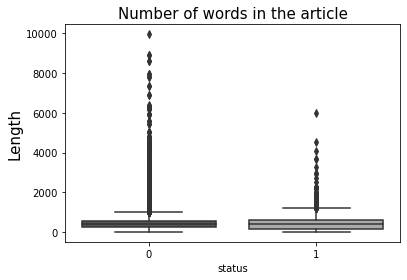

In [526]:
words= sns.boxplot(y='len_tokens', x='status', data=orginal , palette="gray")
words.axes.set_title("Number of words in the article", fontsize=15)
words.set_ylabel("Length",fontsize=15)

plt.show()

In [527]:
orginal['title_tokens'] = orginal['title'].apply(word_tokenize)
orginal['len_title'] = orginal['title_tokens'].apply(len)

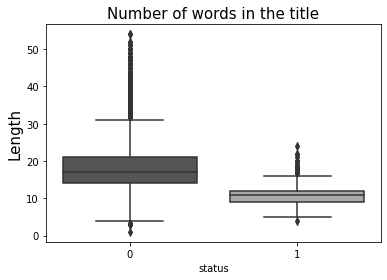

In [528]:
wordti= sns.boxplot(y='len_title', x='status', data=orginal , palette="gray")
wordti.axes.set_title("Number of words in the title", fontsize=15)
wordti.set_ylabel("Length",fontsize=15)

plt.show()

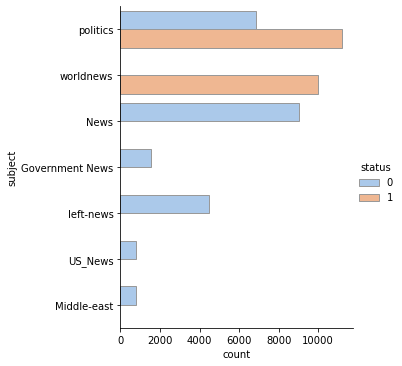

In [529]:
sns.catplot(y="subject", hue="status", kind="count",
            palette="pastel", edgecolor=".6", legend="bool",
            data=df)

In [ ]:
#fake news: 6 columns: News

#and real news 2 columns: pliticsnews



In [ ]:
##saving:

df.to_csv('./fakevstrue_cleaned.csv')

In [530]:
import nltk, re, string, collections
from nltk.util import ngrams

In [531]:
tokenized = fake.text.split()

AttributeError: 'Series' object has no attribute 'split'

In [ ]:
fake.dtypes

In [ ]:
#first get individual words
df.tokenized

In [ ]:
#true_word = fake['lemmatized'](''.join(str(fake['lemmatized'].tolist())))


In [ ]:
fake_bigrams_series = (fapd.Series(nltk.ngrams(df.lemmatized, 2)).value_counts())[:20]

In [ ]:
unigrams_fake = ngrams(" ".join(text for text in df.loc[df["status"]==0].lemmatized_joined).split(), n)


In [532]:
pip install lexical-diversity

Note: you may need to restart the kernel to use updated packages.


In [533]:
from lexical_diversity import lex_div as ld

One useful measure of complexity, a type-token ration (TTR), documents lexical richness, or variety in vocabulary. Does the learner use the same words over and over, or does s/he use a variety of different words to communicate?  A type-token ratio (TTR) is the total number of UNIQUE words (types) divided by the total number of words (tokens) in a given segment of language. 

In [534]:
ld.ttr(fake["lemmatized_joined"])#simple type token ratio 

0.7626981421510142

In [535]:
ld.ttr(real["lemmatized_joined"]) #simple type token ratio -> really high checking it manually 

0.9865635755032766

In [536]:
len((real["lemmatized_joined"]))

21211

In [537]:
len(pd.unique(((real["lemmatized_joined"]))))

20926

In [ ]:
true_orginal['uppercase'] = true_orginal["title"].str.count(r'[A-Z]')

In [ ]:
true_orginal["uppercase"].count()

In [ ]:
fake_orginal["uppercase"] = fake_orginal["title"].str.count(r"[A-Z]")

In [ ]:
fake_orginal["uppercase"].count()

In [ ]:
fake_orginal["title"][76]

In [ ]:
fake_orginal[fake_orginal['title'].str.contains("POPE")].head(1000)

In [ ]:
fake_orginal["text"].iloc[5]

In [ ]:
fake_orginal

In [ ]:
true_orginal

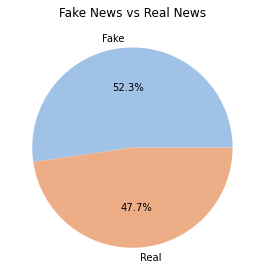

In [538]:
colors = ['#A1C2E7','#EDAE87']

plt.title("Fake News vs Real News")
status=["Fake", "Real"]
slices = [23481,21417]
plt.pie(slices, labels=status, colors=colors, autopct='%1.1f%%')
plt.tight_layout()
plt.show()

In [ ]:
fake_orginal["text"][2]